In [2]:
import itertools
import math
import random

## Styles

In [3]:
styles = {'прическа': ['нет волос',
  'длинные в пучок',
  'длинные волнистые',
  'длинные прямые',
  'короткая волнистые',
  'короткая прямые',
  'короткая курчавые'],
 'цвет волос': ['черный',
  'блонд',
  'каштановый',
  'пастельный розовый',
  'рыжий',
  'серебристо серый'],
 'аксесуар': ['нет очков', 'круглые очки', 'солнцезащитные очки'],
 'одежда': ['худи',
  'комбинезон',
  'футболка с круглым вырезом',
  'футболка с V-вырезом'],
 'цвет одежды': ['черный',
  'синий',
  'серый',
  'зеленый',
  'оранжевый',
  'розовый',
  'красный',
  'белый']}

In [4]:
styles_count = {'прическа': [7, 0, 1, 23, 1, 11, 7],
 'цвет волос': [7, 6, 2, 3, 8, 24],
 'аксесуар': [11, 22, 17],
 'одежда': [7, 18, 19, 6],
 'цвет одежды': [4, 5, 6, 8, 6, 8, 7, 6]}

In [5]:
styles_probs = []
for i in styles:
    styles_count[i] = [x + 1 for x in styles_count[i]]
    count_sum = sum(styles_count[i])
    styles_probs.append([(f'{i}: {x}', y / count_sum) for x, y in zip(styles[i], styles_count[i])])

In [6]:
styles_probs


[[('прическа: нет волос', 0.14035087719298245),
  ('прическа: длинные в пучок', 0.017543859649122806),
  ('прическа: длинные волнистые', 0.03508771929824561),
  ('прическа: длинные прямые', 0.42105263157894735),
  ('прическа: короткая волнистые', 0.03508771929824561),
  ('прическа: короткая прямые', 0.21052631578947367),
  ('прическа: короткая курчавые', 0.14035087719298245)],
 [('цвет волос: черный', 0.14285714285714285),
  ('цвет волос: блонд', 0.125),
  ('цвет волос: каштановый', 0.05357142857142857),
  ('цвет волос: пастельный розовый', 0.07142857142857142),
  ('цвет волос: рыжий', 0.16071428571428573),
  ('цвет волос: серебристо серый', 0.44642857142857145)],
 [('аксесуар: нет очков', 0.22641509433962265),
  ('аксесуар: круглые очки', 0.4339622641509434),
  ('аксесуар: солнцезащитные очки', 0.33962264150943394)],
 [('одежда: худи', 0.14814814814814814),
  ('одежда: комбинезон', 0.35185185185185186),
  ('одежда: футболка с круглым вырезом', 0.37037037037037035),
  ('одежда: футболк

In [7]:
styles_combinations = list(itertools.product(*styles_probs))

In [8]:
styles_combinations[0]

(('прическа: нет волос', 0.14035087719298245),
 ('цвет волос: черный', 0.14285714285714285),
 ('аксесуар: нет очков', 0.22641509433962265),
 ('одежда: худи', 0.14814814814814814),
 ('цвет одежды: черный', 0.08620689655172414))

In [9]:
styles_combinations_probs = [(', '.join([j[0] for j in i]), math.prod([j[1] for j in i])) for i in styles_combinations]

In [10]:
styles_combinations_probs[:10]

[('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: черный',
  5.797766301824104e-05),
 ('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: синий',
  6.957319562188924e-05),
 ('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: серый',
  8.116872822553745e-05),
 ('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: зеленый',
  0.00010435979343283386),
 ('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: оранжевый',
  8.116872822553745e-05),
 ('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: розовый',
  0.00010435979343283386),
 ('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: красный',
  9.276426082918565e-05),
 ('прическа: нет волос, цвет волос: черный, аксесуар: нет очков, одежда: худи, цвет одежды: белый',
  8.1

In [11]:
sum([x[1] for x in styles_combinations_probs])

1.0000000000000042

In [12]:
def generate_style():
    return random.choices(styles_combinations_probs, [x[1] for x in styles_combinations_probs])

## Avatars

In [13]:
from PIL import Image
import numpy as np
import random

In [17]:
img_arrs = []

for i in range(1, 12):
    img = Image.open(f'data/avatars/avatar_{"0" + str(i) if i < 10 else i}.png').convert('RGB')
    img_arr = np.array(img)
    IMG_SIZE = img_arr.shape
    img_arrs.append(img_arr.reshape(-1, 3))
img_arrs = np.stack(img_arrs)

img_stats = []

for channel in range(img_arrs.shape[2]):
    channel_stats = img_arrs[:, :, channel].T.tolist()
    img_stats.append(channel_stats)

In [18]:
def generate_avatar():
    avatar = []
    for channel in img_stats:
        avatar.append([random.choice(x) for x in channel])
    avatar = np.array(avatar).T.reshape(IMG_SIZE).astype('uint8')
    avatar = Image.fromarray(avatar)

    return avatar

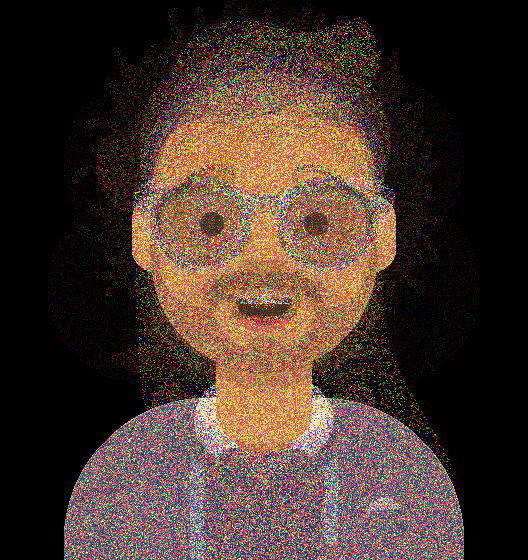

In [19]:
generate_avatar()

In [23]:
for i in range(5):
    avatar = generate_avatar()
    avatar.save(f'data/generated_avatars/generated_avatar_{i}.jpg')

In [24]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/avatars/ (stored 0%)
  adding: content/data/avatars/avatar_10.png (deflated 2%)
  adding: content/data/avatars/avatar_04.png (deflated 4%)
  adding: content/data/avatars/avatar_07.png (deflated 5%)
  adding: content/data/avatars/avatar_01.png (deflated 5%)
  adding: content/data/avatars/avatar_03.png (deflated 1%)
  adding: content/data/avatars/avatar_09.png (deflated 2%)
  adding: content/data/avatars/avatar_11.png (deflated 3%)
  adding: content/data/avatars/avatar_02.png (deflated 2%)
  adding: content/data/avatars/avatar_05.png (deflated 4%)
  adding: content/data/avatars/avatar_08.png (deflated 3%)
  adding: content/data/avatars/avatar_06.png (deflated 3%)
  adding: content/data/generated_avatars/ (stored 0%)
  adding: content/data/generated_avatars/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/generated_avatars/generated_avatar_4.jpg (deflated 1%)
  adding: c